## 模型正则化 Regularization

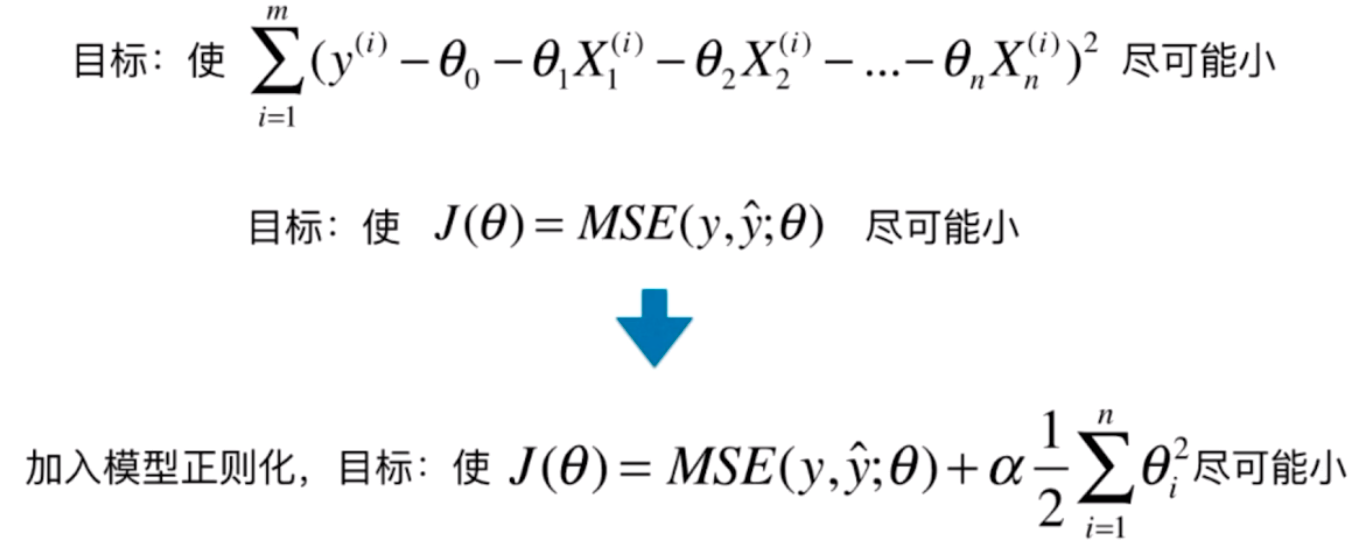

### 岭回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

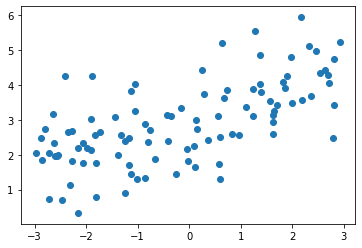

In [3]:
plt.scatter(x, y)
plt.show()

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ('Poly', PolynomialFeatures(degree=degree)),
        ('StandardScaler', StandardScaler()),
        ('lin_reg', LinearRegression())
        ])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

In [22]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

180.05936423695601

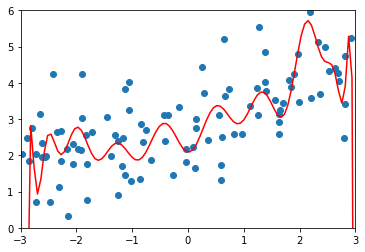

In [27]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)


    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()
    
plot_model(poly_reg)